In [1]:
#import libraries
%matplotlib inline
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading the dataset

In [2]:
#Read the file "dataset.csv" as a dataframe

filename = "dataset.csv"

df = pd.read_csv(filename)

In [3]:
# Assign the values to the predictor and response variables

x = df[['x']].values
y = df.y.values

### Train-validation split

In [4]:
### edTest(test_random) ###

#Split the data into train and validation sets with 75% for training and with a random_state=1
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=1)

### Computing the MSE

In [5]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10

# Create three empty lists to store training, validation and cross-validation MSEs
training_error, validation_error, cross_validation_error = [],[],[]

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    
    #Compute the polynomial features for the entire data, train data and validation data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_val = PolynomialFeatures(d).fit_transform(x_val)
    x_poly = PolynomialFeatures(d).fit_transform(x)

    #Get a Linear Regression object
    lreg = LinearRegression()
    
    #Perform cross-validation on the entire data with 10 folds and get the mse_scores
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring="neg_mean_squared_error",return_train_score=True)
    
    #Fit model on the training set
    lreg.fit(x_poly_train, y_train)

    #Predict of the training and validation set
    y_train_pred = lreg.predict(x_poly_train)
    y_val_pred = lreg.predict(x_poly_val)
    
    #Compute the train and validation MSE
    training_error.append(mean_squared_error(y_train,y_train_pred))
    validation_error.append(mean_squared_error(y_val,y_val_pred))
    
    #Compute the mean of the cross validation error and store in list 
    #Remember to take into account the sign of the MSE metric returned by the cross_validate function 
    cross_validation_error.append(np.mean(-mse_score['test_score']))

### Finding the best degree

In [6]:
### edTest(test_best_degree) ###

#The best degree with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)


#The best degree with the lowest cross-validation error
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)


print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)

The best degree of the model using validation is 2
The best degree of the model using cross-validation is 2


### Plotting the error graph

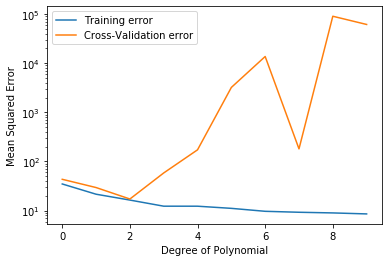

In [7]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors

fig, ax = plt.subplots()

#Plot the training error with labels
ax.plot(range(maxdeg), training_error, label = 'Training error')

#Plot the cross-validation error with labels
ax.plot(range(maxdeg), cross_validation_error, label = 'Cross-Validation error')

# Set the plot labels and legends

ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')
plt.show()